## Import Libraries

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Import Dataset

In [4]:
mnist = tf.keras.datasets.mnist.load_data()

In [5]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
# Checking the size/shape of the MNIST dataset
len(mnist), len(mnist[0]), len(mnist[1]), len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(2, 2, 2, 60000, 60000, 10000, 10000)

As we can see the mnist dataset contains two sets of hand-written digits (0 to 9), the first one is the train test which contains 60000 training example with
their labels (y_train). On the other hand, the 10000 samples refer to the testing set

## Data Preprocessing

In [17]:
(X_train, y_train), (X_test, y_test) = mnist
print("Total training examples: ",len(X_train))
print("Total testing examples: ",len(X_test))

Total training examples:  60000
Total testing examples:  10000


In [72]:
X_train[0].shape

(28, 28)

Each training example in the training set is representing a 28 by 28 matrix, each cell contains a value between 0 and 255 
representing the grayscale level for each cell/pixel, 0 for black and 255 for white

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is number  5


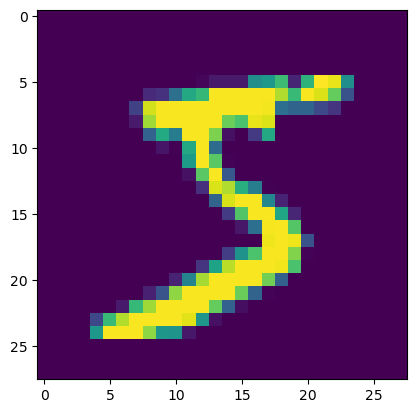

In [19]:
# Let's visualize this as an image
plt.imshow(X_train[0])
print("This is number ", y_train[0])

This is number  9


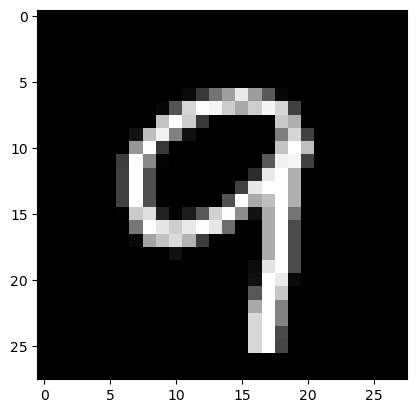

In [22]:
# Another example
plt.imshow(X_train[322], cmap = plt.cm.gray)
print("This is number ", y_train[322])

## Building the model

At this stage we tend to build a model that can be able to classify digits images

In [23]:
# Let's create and initialize the model 
'''
    A way of creating deep learning models where an instance of the Sequential class is created and 
    model layers are created and added to it
'''
model = tf.keras.models.Sequential()

In [29]:
# We then add the input layer, the hidden layer(s), and the output layer to the initialized model
'''
    As we have seen, each training example is a 28 by 28 matrix, and because we are going to use ANN and not CNN, 
    I am going to reshape the input data as a single array that contains 28*28 = 784 elements
'''
# Adding the input layer
model.add(tf.keras.layers.Flatten())
# Adding the first hidden layer that contains 256 neurons
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
# Adding the second hidden layer that contains 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Adding the output layer that contains 10 output neurons, each of them representing the probability of getting a digit [0-9]
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [30]:
# Compiling the model, selecting the optimization algorithm to be used to train the model and the metrics to be tracked
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [31]:
# Fitting the data to the ANN model
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5654 - accuracy: 0.8857
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2329 - accuracy: 0.9379
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1750 - accuracy: 0.9519
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1498 - accuracy: 0.9584
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9614
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9661
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9696
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9707
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9744
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.093

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Testing the model on the unseen data
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1676 - accuracy: 0.9675
0.1676355004310608 0.9674999713897705


In [79]:
predictions = model.predict(X_test)

The actual digit is:  7
The predicted digit is:  7


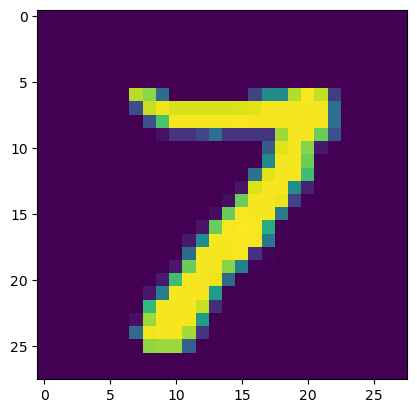

In [80]:
# Let's check an example
plt.imshow(X_test[34])
print("The actual digit is: ", y_test[34])
print("The predicted digit is: ", np.argmax(predictions[34]))

The actual digit is:  5
The predicted digit is:  5


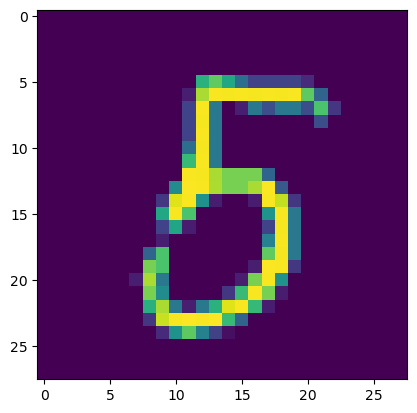

In [81]:
# Let's check an example
plt.imshow(X_test[45])
print("The actual digit is: ", y_test[45])
print("The predicted digit is: ", np.argmax(predictions[45]))

<AxesSubplot: >

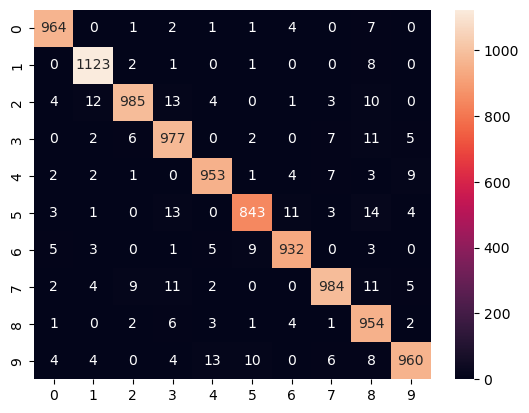

In [82]:
# Let's plot the confusion matrix
predictions = [np.argmax(x) for x in predictions]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')